# Chapter 1. Exploratory Data Analysis
21 / April / 2022

## Introduction
- **Jhon W. Tukey** was the greatest reformer of statistics with his hisseminal paper "The Future of Data Analysis" [Tukey, 1962]. He proposed the "Data Analysis" specific discipline which includes statistical inference as just one component.

<br/>

- The field of exploratory data analysis was established with Tukey's 1977 classic book *Exploratory Data Analysis*.
-----

## Elements of Structured Data
A major challenge of data science is to harness this torrent of raw data into actionable information. One of the commonest forms of structured data is a table with rows and columns - as data might emerge from a relational database or be collected for a study.

- **Numeric**
    - Data that are expressed on a numeric scale
        - **Continuous**
            - Data that can take on any value in  an interval. (*Synonyms*: Interval, float, numeric)
        - **Discrete**
            - Data that can take on only integer values, such as counts. (Integer, Count)
- **Categorical**
    - Data that can take on only a specific set of values representing a set of possible categories. (Enums, Enumerated, Factors, Nominal)
        - **Binary**
            - A special case of categorical data with just two categories of values, e.g., 0 or 1, true or false. (Dichotomous, Logical, Indicator, Boolean)
        - **Ordinal**
            - Categorical data that has an explicit ordering (Ordered Factor)

#### Key Ideas
- Data is typically classified in software by type.
- Data types include numeric (continuous, discrete) and categorical (binary, ordinal).
- Data typing in software acts as a signal to the software on how to process the data.
------

## Rectangular Data
Is the general term for a two-dimensional matrix with rows indicating records (cases) and columns indicating features (variables).
- **Data frame**
    - Rectangular data (like a spreadsheet) is the basic data structure for statistical and machine learning model.
- **Feature**
    - A column within a table is commonly referred to as a *feature*
    - Synonyms: Attribute, input, predictor, variable
- **Outcome**
    - Many data science projects involve predicting an outcome. The *features* are sometimes used to predict the outcome in an experiment or a study.
    - Synonyms: Dependent variable, Response, target, Output
- **Records**
    - A row within a table is commonly referred to as a *record*
    - Synonyms: Case, Example, Observation, Pattern, Sample

### Nonrectangular Data Structures
Time series data records successive measurements of the same variable. It is the raw material for statistics forecasting methods. Spatial data structures, which are used in mapping and location analytics, are more complex and varied than rectangular data structures.

----

## Estimates of Location
Variables with measured or count data might have thousands of distinct values. A basic step in exploring your data is getting a "typical value" for each feature (variable): an estimate of where most of the data is located (i.e., its central tendency).
- **Mean**
    - The sum of all values divided by the number of values.
    - Synonyms: Average
- **Weighted Mean**
    - The sum of all values times a weight divided by the sum of the weights.
    - Synonyms: Weighted Average
- **Median**
    - The value such that one-half of the data lies above and below.
    - Synonyms: 50th Percentile
- **Percentile**
    - The value such that P percent of the data lies below
    - Synonyms: Quantile
- **Weighted Median**
    - The value such that one-half of the sum of the weights lies above and below the sorted data
- **Trimmed Mean**
    - The average of all values after dropping a fixed number of extreme values
    - Synonym: Truncated mean
- **Robust**
    - Not sensitive to extreme values
    - Synonym: Resistant
- **Outlier**
    - A data value that is very different from most of the data
    - Synonym: Extreme value

### Example: Location Estimates of Population and Murder Rates

In [1]:
import pandas as pd
from scipy import stats

In [2]:
state = pd.read_csv('state.csv')

In [3]:
state['Population'].mean() #The mean is 6162876

6162876.3

In [4]:
stats.trim_mean(state['Population'], 0.1) # The 10% trimmed mean is 4783697

4783697.125

In [5]:
state['Population'].median() # The median is 4436369

4436369.5

The mean is *bigger* than the trimmed mean, which is bigger than the median.

<br/>

This is because the trimmed mean excludes the largest and smallest five states (trim = 0.1 drops 10% from each end, and we have 50 states). If we want to compute the average murder rate for the country, we need to use a **weighted mean** or **weighted median** to account for different populations in the states.

In [6]:
import numpy as np

In [7]:
np.average(state['Murder.Rate'], weights=state['Population'])

4.445833981123393

In [8]:
import weightedstats as w

In [9]:
w.numpy_weighted_median(state['Murder.Rate'], weights=state['Population'])

4.4

In this case, the weighted mean and the weighted median are about the same.

<br/>

### Key Ideas
- The basic metric for location is the mean, but it can be sensitive to extreme values(outliers).
- Other metrics (median, trimmed mean) are less sensitive to outliers and unusual distributions and hence are more robust.
-----

## Estimates of variability
A second dimension, *variability*, also referred to as *dispersion*, measures whether the data values are tightly clustered or spread out. At the hearth of statistics lies variability: measuring it, reducing it, distinguishing random from real variability, identifying the various sources of real variability, and making decisions in the presence of it.

- **Deviations**
    - The difference between the observed values and the estimate of location
    - Synonyms: Errors, Residuals
- **Variance**
    - The sum of squared deviations from the mean divided by n - 1 where n is the numer of data values
    - Synonyms: Mean-Squared-Error
- **Standard Deviation**
    - The square root of the variance
- **Mean Absolute Deviation**
    - The mean of the absolute values of the deviations from the mean
    - Synonyms: l1-norm, Manhattan norm
- **Median Absolute Deviations from the Median**
    - The median of the absolute values of the deviations from the median
- **Range**
    - The difference between the largest and the smallest value in the data set
- **Order Statistics**
    - Metrics based on the data values sorted from the smallest to biggest
    - Synonyms: Ranks
- **Percentile**
    - The value such that P percent of the values take on this value or less and (100-P) percent take on this value or more.
    - Synonym: Quantile
- **Interquartile Range**
    - The difference between the 75th percentile and the 25th percentile
    - Synonym: IQR

### Example: Variability Estimates of State Population

In [10]:
state['Population'].std() # The Standard Deviation is 6848235

6848235.347401142

In [11]:
state['Population'].quantile(0.75) - state['Population'].quantile(0.25)
# IQR -> Inter quartile Range is 4847308

4847308.0

In [12]:
import statsmodels
from statsmodels import robust

statsmodels.robust.scale.mad(state['Population']) # MAD is 3849876

3849876.1459979336

The standard deviation is almost twice as large as the MAD. This is not surprising since the standard deviation is sensitive to outliers.

<br/>

### Key Ideas
- Variance and standard deviation are the most widespread and routinely reported statistics of variability.
- Both are sensitive to outliers
- More robust metrics include mean absolute deviation, median absolute deviation from the median, and percentiles (quantiles).

------

## Exploring the Data Distribution
It is useful to explore how the data is distributed overall.
- **Boxplot**
    - A plot introduced by Tukey as a quick way to visualize the distribution of the data.
    - Synonym: Box and whiskers plot
- **Frequency Table**
    - A tally of the count of numeric data values that fall into a set of intervals (bins).
- **Histogram**
    - A plot of the frequency table with the bins on the x-axis and the count (or proportion) on the y-axis.
- **Density Plot**
    - A smoothed version of the histogram, often based on a *kernel density estimate*.

### Percentiles and Boxplots

In [13]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]) # Percentile

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

The median is 4 murders per 100.000 people , although there is a quite a bit of variability: the 5th percentile is 1.6 and the 95th percentile is 6.51

Text(0, 0.5, 'Population (millions)')

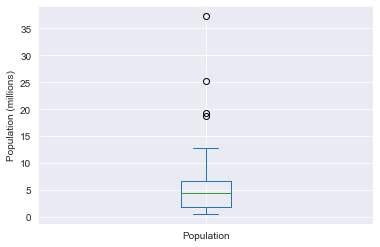

In [14]:
ax = (state['Population']/1_000_000).plot.box() #boxplot
ax.set_ylabel('Population (millions)')

From this boxplot we can see that the median state population is about 5 million, half the states fall between 2 million and about 7 million, and there are some outliers like California with 37 million (single circles).

<br/>

The top and bottom of the box are the 75th and 25th percentiles.

<br/>

The median is shown by the horizontal line in the box. The blue lines, referred as *whiskers*, extend from the top and bottom of the box to indicate the range for the bulk of the data.

### Frequency Tables and Histograms

In [15]:
# Frequency Tables
binnedPopulation = pd.cut(state['Population'], 10) #10 divisions
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

Both frequency tables and percentiles summarize the data by creating bins. In general, quartiles and deciles will have the same count in each bin (equal-count bins), but the bin sizes will be different. The frequency table, by contrast, will have different counts in the bins (equal-size bins), and the bin sizes will be the same.

Text(0.5, 0, 'Population (millions)')

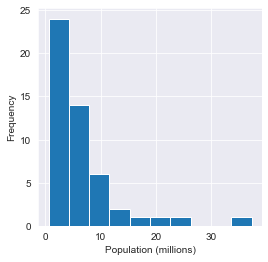

In [16]:
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4,4))
ax.set_xlabel('Population (millions)')


Bars are contiguous, no empty space shows between bars, unless there is an empty bin.

<br/>

In statistical theory, location and variability are referred to as the first and second moments of a distribution. The third and fourth moments are called *skewness* and *kurtosis*. Skewness refers to whether the data is skewed to larger or smaller values, and kurtosis indicates the propensity of the data to have extreme values.

### Density Plots and Estimates
Related to the histogram is a density plot, which shows the distribution of data values as a continuous lines.

Text(0.5, 0, 'Murder Rate (per 100.000)')

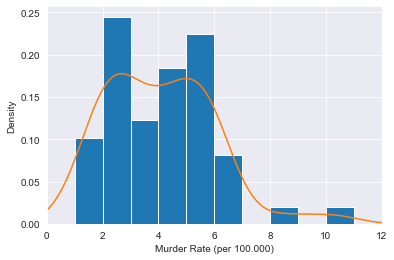

In [17]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax) #(1)
ax.set_xlabel('Murder Rate (per 100.000)')
#(1) Plot functions often take an optional axis (ax) argument, which will cause the plot to be added to the same graph

A key distinction from the histogram plotted above is the scale of the y-axis: a density plot corresponds to plotting the histogram as a proportion rather than counts.

### Key Ideas
- A frequency histogram plots frequency counts on the y-axis and variable values on the x-axis: it gives a sense of the distribution of the data at a glance.
- A frequency table is tabular version of the frequency counts found in a histogram.
- A boxplot - with the top and the bottom of the box at the 75th and 25th percentiles. also gives a quick sense of distribution of the data.
- A density plot is smoothed version of a histogram; it requires a function to estimate a plot based on the data.

----

## Exploring Binary and Categorical Data
For categorical data, simple proportions or percentages tell the story of the data.
- **Mode**
    - The most commonly occurring category or value in data set
- **Expected Value**
    - When the categories can be associated with a numeric value, this gives an average value based on a category's probability of occurrence.
- **Bar Charts**
    - The frequency or proportion for each category plotted as bars.
- **Pie Charts**
    - The frequency or proportion for each category plotted as wedges in a pie.

### Bar Chart
Bar charts, seen often in the popular press, are a common visual tool for displaying a single categorical variable. Categories are listed on the x-axis, and frequencies or proportions on the y-axis

In [18]:
dfw = pd.read_csv('dfw_airline.csv')

Text(0, 0.5, 'Count')

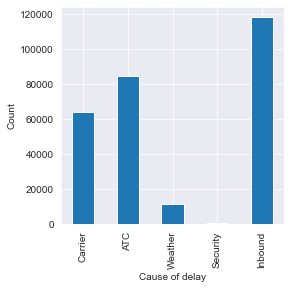

In [19]:
ax = dfw.transpose().plot.bar(figsize=(4,4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

Note that a bar chart resembles a histogram; in a bar chart the x-axis represents different categories of a factor variable, while in a histogram the x-axis represent values of a single variable on a numerica scale. In a histogram, the bars are typically shown touching eac other, with gaps indicating values that did not occur in the data. In a bar chart, the bars are shown separate from one another.

### Key Ideas
- Categorical data is typically summed up in proportions and can be visualized in a bar chart
- Categories might represent distinct things (apple and oranges, male and female), levels of a factor variable (low, medium and high), or numeric data that has been binned.
- Expected value is the sum of values times their occurrence, often used to sum up factor variable levels.

-----

## Correlation
Exploratory data analysis in many modeling projects (whether in data science or in research) involves examining correlation among predictors, and between predictors and a target variable. Variable X and Y (each with measured data) are said to be positive correlated if high values of X go with high values of Y, and low values of X go with low values of Y. If high values of X go with low values of Y, and vice versa, the variables are negatively correlated.
- **Correlation Coefficient**
    - A metric that measures the extent to which numeric variables are associated with one another (ranges from -1 to +1)
- **Correlation Matrix**
    - A table where the variables are shown on both rows and columns, and the cell are the correlations between the variables.
- **Scatterplot**
    - A plot in which the x-axis is the value of one variable, and the y-axis the value of another.

<br/>

Variables can have an association that is not linear, in which case the correlation coeficient may not be a useful metric.

<AxesSubplot:>

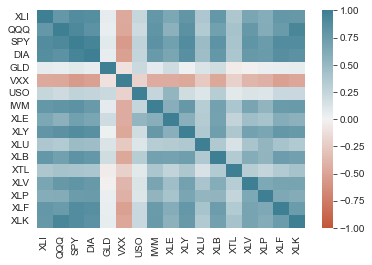

In [20]:
import seaborn as sns

sp500_px = pd.read_csv('sp500_data.csv.gz', index_col=0)
sp500_sym = pd.read_csv('sp500_sym.csv')
etfs = sp500_px.loc[sp500_px.index > '2012-07-01',
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
sns.heatmap(etfs.corr(), vmin=-1, vmax=1,
            cmap=sns.diverging_palette(20, 220, as_cmap=True))

The ETFs for the S&P 500 (SPY) and the Dow Jones Index (DIA) have a high correlation. Similarly, the QQQ and the XLK, composed mostly of technology companies, are positively correlated. Defensive ETFs, such as those tracking gold prices (GLD), oil prices (USO), or market volatility (VXX), tend to be weakly or negatively correlated with other ETFs.

<br/>

Like the mean and standard deviation, the correlation coefficient is sensitive to outliers in the data.

### Scatterplots

In [21]:
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]

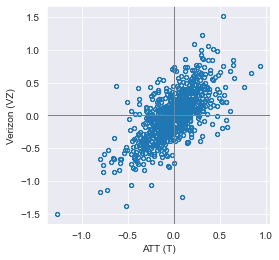

In [22]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4,4), marker = '$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color = 'grey', lw=1)
ax.axvline(0, color = 'grey', lw=1)

The returns have a positive relationship: while they  cluster around zero, on most days, the stock go up or go down in tandem (upper-right and lower-left quadrants).

While the plot displays only 754 data points, it's already obvious how difficult it is to identify details in the middle of the plot. We will see later how adding transparency to the points, or using hexagonal binning and density plots, can help to find additional structure in the data.

### Key Ideas
- The correlation coefficient measures the extent to which two paired variables are associated with one another.
- When high values of v1 go with high values of v2, v1 and v2 are positively associated.
- When high values of v1 go with low values of v2, v1 and v2 are negatively associated.
- The correlation coefficient is a standardized metric, so that it always ranges from -1 (perfect negatively correlation) to +1 (perfect positively correlation).
- A correlation coefficient of zero indicates no correlation, but be aware that random arrangements of data will produce both positive and negative values for the correlation coefficient just by chance

----

## Exploring Two or More Variables
Familiar estimators like mean and variance look at variables one at a time (*univariate analysis*). Correlation analysis is an important method that compares two variables (*bivariate analysis*)> In this section we look at additional estimates and plots, and at more than two variables (*multivariate analysis*).

- **Contingency Table**
    - A tally of counts between two or more categorical variables.
- **Hexagonal Binning**
    - A plot of two numeric variables with the records binned into hexagons.
- **Contour Plot**
    - A plot showing the density of two numeric variables like a topographical map.
- **Violin Plot**
    - Similar to a boxplot but showing the density estimate

### Hexagonal Binning and Contours
Scatterplots are fine when there us a relatively small number of data values. The plot of stocks returns above involves only about 750 points. For data sets with hundreds of thousands or millions of records, a scatterplot will be too dense, so we need a different way to visualize the relationship.

In [23]:
# We need to filter the data first
kc_tax = pd.read_csv('kc_tax.csv')
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) &
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
kc_tax0.shape

(432693, 3)

Text(0, 0.5, 'Tax-Assessed Value')

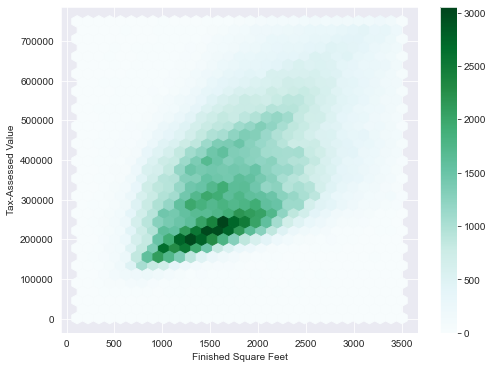

In [24]:
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(8,6))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')

Rather than plotting points, which would appear as a monolithic dark cloud, we grouped the records into hexagonal bins and plotted the hexagons with a color indicating the number of records in that bin. In this chart, the positive relationship between square feet and tax-assessed value is clear. An interesting feature is the hint of additional bands above the main (intense color) band at the bottom, indicating homes that have the same square footage as those in the main band but a higher tax-assessed value.

### Contours

In [41]:
import matplotlib.pyplot as plt

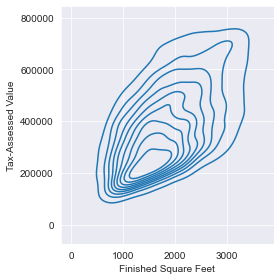

In [44]:
fig, ax = plt.subplots(figsize=(4,4))
sns.kdeplot(data=kc_tax0.sample(10000), x ='SqFtTotLiving', y ='TaxAssessedValue', ax = ax)
ax.set_ylabel('Tax-Assessed Value')
ax.set_xlabel('Finished Square Feet')

plt.tight_layout()
plt.show()

Here we used contours overlaid onto a scatter plot to visualize the relationship between two numeric variables. The contours are essentially a topographical map to two variables; each contour band represents a specific density of points, increasing as one nears a "peak". This plot shows a similar story as the hexagonal binning one: there is a secondary "north" of the main peak.

### Two categorical variables
A useful way to summarize two categorical variables is a contingency table - a table of counts by category.

In [32]:
lc_loans = pd.read_csv('lc_loans.csv')

In [33]:
crosstab = lc_loans.pivot_table(index='grade', columns = 'status',
                                aggfunc=lambda x: len(x), margins=True) #(1)
df = crosstab.loc['A':'G',:].copy() #(2)
df.loc[:, 'Charged Off':'Late'] = df.loc[:, 'Charged Off':'Late'].div(df['All'], axis = 0) #(3)
df['All'] = df['All'] / sum(df['All']) #(4)
perc_crosstab = df
#(1) The margins keyword argument will add the column and row sums
#(2) We create a copy of the pivot table, ignoring the column sums
#(3) We divide the rows with the row sum
#(4) We divide the 'All' column by its sum

In [37]:
crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [38]:
perc_crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


This is taken from data provided by Lending Club, a leader in the peer-to-peer lending business. The grade goes from A (high) to G (low). The outcome is either fully paid, current, late, or charged off (the balance of the loan is not expected to be collected). These tables show the count and row percentages. High-grade loans have a very low late/charge-off percentage as compared with lower-grade loans.

### Categorical and Numerical Data

#### Boxplot
Boxplots are a simple way to visually compare the distributions of a numeric variable grouped according to a categorical variable. We might want to compare how the percentage of flight delays varies across airlines. The graph below shows the percentage of flights in a month that were delayed where the delay was within the carrier's control.

Text(0.5, 0.98, '')

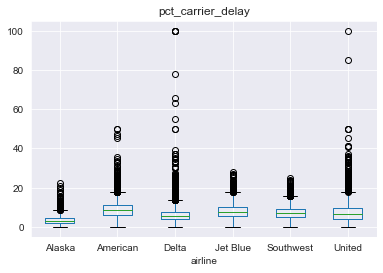

In [52]:
airline_stats = pd.read_csv('airline_stats.csv')
airline_stats.boxplot(by='airline', column='pct_carrier_delay')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

Alaska stands out as having the fewest delays, while has the most delays: the lower quartile for American is higher than the upper quartile for Alaska.

#### Violin Plot
A violin plot, introduced by Hintze-Nelson, is an enhancement to the boxplot and plots the density estimate with the density on the y-axis. The density is mirrored and flipped over, and the resulting shape is filled in, creating an image resembling a violin.

The advantage of a violin plot is that it can show nuances in the distribution that aren't perceptible in a boxplot. On the other hand, **the boxplot more clearly shows the outliers in the data**.

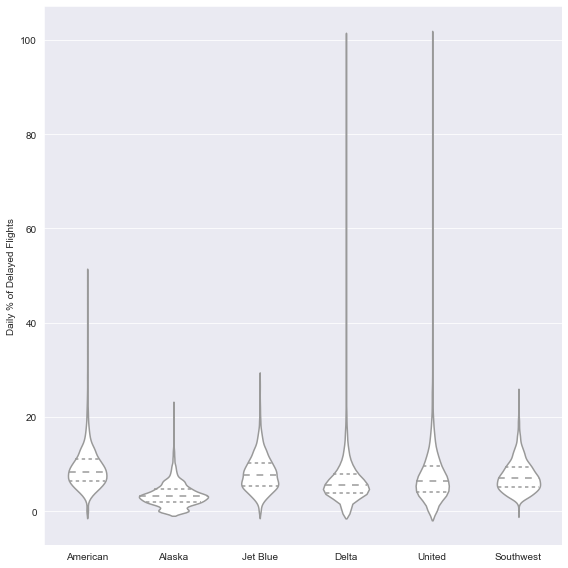

In [49]:
fig, ax = plt.subplots(figsize=(8,8))
sns.violinplot(data = airline_stats, x = 'airline', y = 'pct_carrier_delay',
               ax = ax, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

plt.tight_layout()
plt.show()

The violin plot shows a concentration in the distribution near zero from Alaska and, to a lesser extent, Delta. This phenomenon is not as obvious in the boxplot.

### Visualizing Multiple Variables

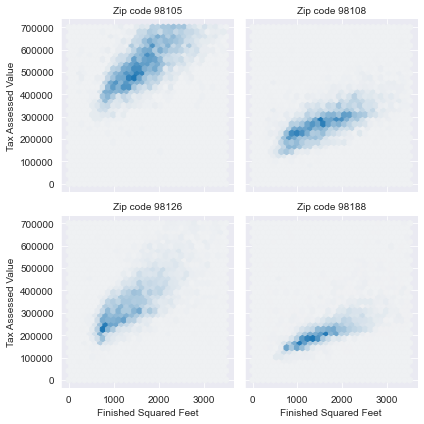

In [53]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x,y,gridsize=30, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2) #(1)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue',
      extent=[0, 3500, 0, 700000]) #(2)
g.set_axis_labels('Finished Squared Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

plt.tight_layout()
plt.show()
#(1) Use the arguments col and row to specify the conditioning variables. For a single conditioning variable,
# use col together with col_wrap to wrap the faceted graphs into multiple rows.
#(2) The map method calls the hexbin function with subsets of the original data set for the different zip
# codes. extent defines the limits of the x- and y-axes.

Now the picture is much clearer: tax-assessed value is much higher in some zip codes (98105, 98126) than in others (98108, 98188). This disparity gives rise to the clusters observed in the hexagonal binning one.
### Key Ideas
- Hexagonal binning and contour plots are useful tools that permit graphical examination of two numeric variables at a time, without being overwhelmed by huge amounts of data
- Contingency tables are the standard tool for looking at the counts of two categorical variables.
- Boxplots and violin plots allows you to plot a numeric variable against a categorical variable.

----